In [1]:
#Author: @michaelbrink
#Org: BalloonBox Inc.

In [2]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Imported the data files

In [3]:
df_all = pd.read_csv('Fortune500_cleaned.csv')
df_detail = pd.read_csv('Fortune500-2_cleaned.csv')

# Modelling

In [4]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
from scipy.stats import multivariate_normal as mvn
from sklearn.linear_model import LogisticRegression

In [5]:
def determine_k_Kmeans(df):
    # Use the Elbow Method to show the optimal k in KMeans
    distortions = []
    K = range(1,15)
    for k in K:
        cluster_model = KMeans(n_clusters=k,random_state=11)
        cluster_model.fit(df)
        distortions.append(sum(np.min(cdist(df,cluster_model.cluster_centers_,'euclidean'),axis=1))/df.shape[0])

    # Plot the elbow
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()

## Overall dataset (Linear Model)

### Revenue Model(ALL)

In [6]:
# Extract features and target
df = df_all.copy()
X = df.iloc[:,18:]
y = df['Revenue_cat']
# Train and test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=11)


# Instantiate the linear model
linear_model = LogisticRegression()
# Fit the model
linear_model.fit(X_train,y_train)


# Coefs for each feature
coefs_list = list(linear_model.coef_)
relationship_df = pd.DataFrame()
for num,coefs in enumerate(coefs_list):

    # Features
    features = X_train.columns

    # Create a dict to store the value
    res_dict={}
    for index,col in enumerate(features):
        res_dict[col] = round(coefs[index],2)

    # Display the coef_df
    index = list(res_dict.keys())
    coef = list(res_dict.values())
    coef_df = pd.DataFrame(index=index,data=coef,columns=['Coef'])
    coef_df['Sign'] = np.where(coef_df['Coef']>0,1,-1)
    coef_df = coef_df.add_suffix('_Revenue_{}'.format(num))
    relationship_df = pd.concat([relationship_df,coef_df],axis=1)
relationship_df

,Coef_Revenue_0,Sign_Revenue_0,Coef_Revenue_1,Sign_Revenue_1,Coef_Revenue_2,Sign_Revenue_2
Filter_cat_0,-0.26,-1,-0.03,-1,0.29,1
Filter_cat_1,0.09,1,0.11,1,-0.20,-1
Filter_cat_2,0.17,1,-0.08,-1,-0.09,-1
Profit ($M)_cat_1,0.17,1,0.15,1,-0.33,-1
Profit ($M)_cat_2,0.26,1,-0.26,-1,-0.00,-1
Profit ($M)_cat_3,0.26,1,-0.13,-1,-0.13,-1
Profit ($M)_cat_4,0.01,1,0.02,1,-0.02,-1
Profit ($M)_cat_5,-0.70,-1,0.22,1,0.47,1
Assets ($M)_cat_1,1.37,1,-0.55,-1,-0.82,-1
Assets ($M)_cat_2,0.53,1,0.25,1,-0.78,-1


### model for No Filter

In [7]:
# Extract features and target
df = df_all.copy()
X = df.iloc[:,21:]
y = df['Filter_cat_0']


# Instantiate the linear model
linear_model = LogisticRegression()
# Fit the model
linear_model.fit(X,y)


# Coefs for each feature
coefs_list = linear_model.coef_[0]
features = X.columns

# Create a dict to store the value
res_dict={}
for index,col in enumerate(features):
    res_dict[col] = round(coefs_list[index],2)

# Display the coef_df
index = list(res_dict.keys())
coef = list(res_dict.values())
coef_df = pd.DataFrame(index=index,data=coef,columns=['Coef'])
coef_df['Sign'] = np.where(coef_df['Coef']>0,1,-1)
coef_df

,Coef,Sign
Profit ($M)_cat_1,-0.21,-1
Profit ($M)_cat_2,-0.20,-1
Profit ($M)_cat_3,0.25,1
Profit ($M)_cat_4,0.25,1
Profit ($M)_cat_5,-0.09,-1
Assets ($M)_cat_1,-0.24,-1
Assets ($M)_cat_2,-0.14,-1
Assets ($M)_cat_3,0.13,1
Assets ($M)_cat_4,0.11,1
Assets ($M)_cat_5,0.14,1


### Model for Female CEO

In [8]:
# Extract features and target
df = df_all.copy()
X = df.iloc[:,21:]
y = df['Filter_cat_1']


# Instantiate the linear model
linear_model = LogisticRegression()
# Fit the model
linear_model.fit(X,y)


# Coefs for each feature
coefs_list = linear_model.coef_[0]
features = X.columns

# Create a dict to store the value
res_dict={}
for index,col in enumerate(features):
    res_dict[col] = round(coefs_list[index],2)

# Display the coef_df
index = list(res_dict.keys())
coef = list(res_dict.values())
coef_df = pd.DataFrame(index=index,data=coef,columns=['Coef'])
coef_df['Sign'] = np.where(coef_df['Coef']>0,1,-1)
coef_df

,Coef,Sign
Profit ($M)_cat_1,-0.10,-1
Profit ($M)_cat_2,-0.11,-1
Profit ($M)_cat_3,-0.29,-1
Profit ($M)_cat_4,0.21,1
Profit ($M)_cat_5,0.30,1
Assets ($M)_cat_1,0.14,1
Assets ($M)_cat_2,0.03,1
Assets ($M)_cat_3,-0.33,-1
Assets ($M)_cat_4,0.13,1
Assets ($M)_cat_5,0.04,1


### Model for Founder CEO

In [9]:
# Extract features and target
df = df_all.copy()
X = df.iloc[:,21:]
y = df['Filter_cat_2']


# Instantiate the linear model
linear_model = LogisticRegression()
# Fit the model
linear_model.fit(X,y)


# Coefs for each feature
coefs_list = linear_model.coef_[0]
features = X.columns

# Create a dict to store the value
res_dict={}
for index,col in enumerate(features):
    res_dict[col] = round(coefs_list[index],2)

# Display the coef_df
index = list(res_dict.keys())
coef = list(res_dict.values())
coef_df = pd.DataFrame(index=index,data=coef,columns=['Coef'])
coef_df['Sign'] = np.where(coef_df['Coef']>0,1,-1)
coef_df

,Coef,Sign
Profit ($M)_cat_1,0.54,1
Profit ($M)_cat_2,0.57,1
Profit ($M)_cat_3,-0.16,-1
Profit ($M)_cat_4,-0.87,-1
Profit ($M)_cat_5,-0.08,-1
Assets ($M)_cat_1,0.40,1
Assets ($M)_cat_2,0.30,1
Assets ($M)_cat_3,0.09,1
Assets ($M)_cat_4,-0.46,-1
Assets ($M)_cat_5,-0.33,-1


## Detailed dataset(Clustering)

In [10]:
df_detail.head()

,Country,Headquarters,Industry,CEO,Website,Company Type,Ticker,Revenues ($M),Profits ($M),Market Value ($M),...,Total Stockholder Equity ($M)_cat_1,Total Stockholder Equity ($M)_cat_2,Total Stockholder Equity ($M)_cat_3,Total Stockholder Equity ($M)_cat_4,Total Stockholder Equity ($M)_cat_5,Earnings Per Share ($)_cat_1,Earnings Per Share ($)_cat_2,Earnings Per Share ($)_cat_3,Earnings Per Share ($)_cat_4,Earnings Per Share ($)_cat_5
0,U.S.,Chesterbrook Pa.,Wholesalers: Health Care,Steven H. Collis,https://www.amerisourcebergen.com,Public,ABC,179589.1,855.4,18221.4,...,0,0,0,1,0,0,0,0,1,0
1,U.S.,Dublin Ohio,Wholesalers: Health Care,Michael C. Kaufmann,https://www.cardinalhealth.com,Public,CAH,145534.0,1363.0,13988.1,...,0,0,0,0,1,0,0,0,1,0
2,U.S.,St. Louis Mo.,Health Care: Insurance and Managed Care,Michael F. Neidorff,https://www.centene.com,Public,CNC,74639.0,1321.0,34862.4,...,0,0,0,0,1,0,0,0,1,0
3,U.S.,Midland Mich.,Chemicals,James R. Fitterling,https://www.dow.com,Public,DOW,42951.0,-1359.0,21716.0,...,0,0,0,0,1,1,0,0,0,0
4,U.S.,Clearwater Fla.,Wholesalers: Electronics and Office Equipment,Richard T. Hume,https://www.techdata.com,Public,TECD,36998.4,374.5,4645.0,...,0,0,0,1,0,0,0,0,0,1


In [11]:
df_detail_copy = df_detail.copy()
df_detail_copy = df_detail_copy.iloc[:,30:]

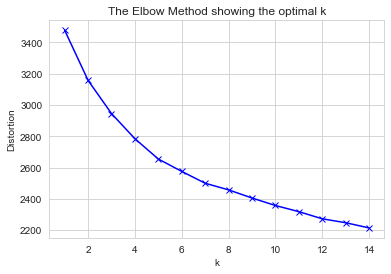

'K=5'

In [12]:
k_range = np.arange(1,15)
inertia_list = []
for k in k_range:
    cluster_model=KMeans(n_clusters=k,random_state=11)
    cluster_model.fit(df_detail_copy)
    inertia_list.append(cluster_model.inertia_)

# Plot the elbow
plt.plot(k_range, inertia_list, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
'''K=5'''

In [13]:
# Fit the KMeans clustering model with K=5
cluster_model=KMeans(n_clusters=5,random_state=11)
# Predict the labels
labels = cluster_model.fit_predict(df_detail_copy)

# centroids Information
centroids = pd.DataFrame(cluster_model.cluster_centers_,columns=df_detail_copy.columns)
centroids = centroids.round(1).T
centroids = pd.DataFrame(np.where(centroids>=0.5,1,0),index=centroids.index,columns=centroids.columns)
display(centroids)
print(np.unique(labels,return_counts=True))

,0,1,2,3,4
Revenues ($M)_cat_1,0,0,0,0,0
Revenues ($M)_cat_2,0,0,0,0,0
Revenues ($M)_cat_3,0,0,0,0,0
Revenues ($M)_cat_4,0,0,0,0,0
Revenues ($M)_cat_5,0,0,0,0,1
Profits ($M)_cat_1,0,0,0,1,0
Profits ($M)_cat_2,1,0,0,0,0
Profits ($M)_cat_3,0,1,0,0,0
Profits ($M)_cat_4,0,0,1,0,0
Profits ($M)_cat_5,0,0,0,0,1


(array([0, 1, 2, 3, 4], dtype=int32), array([115, 145, 128, 116, 117]))


In [14]:
def plot_kmeans(kmeans, X, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max() for i, center in enumerate(centers)]
    
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

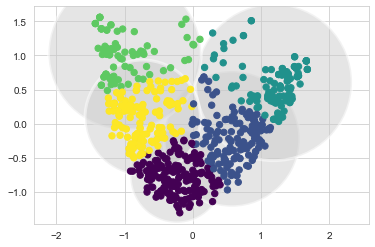

In [15]:
# Plot the KMeans result
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(df_detail_copy)
kmeans = KMeans(n_clusters=5, max_iter=600, algorithm = 'auto')
fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)
plot_kmeans(kmeans, Y_sklearn)